In [1397]:
#import  libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [1398]:
#Load Data 
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [1399]:
#shape of the data
df.shape

(25480, 12)

In [1400]:
# different types of coloumns 
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [1401]:
#infomation about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [1402]:
# check the null values
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [1403]:
df.isna().mean()*100

case_id                  0.0
continent                0.0
education_of_employee    0.0
has_job_experience       0.0
requires_job_training    0.0
no_of_employees          0.0
yr_of_estab              0.0
region_of_employment     0.0
prevailing_wage          0.0
unit_of_wage             0.0
full_time_position       0.0
case_status              0.0
dtype: float64

In [1404]:
# description of numerical columns
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [1405]:
# there is no use case of case id show we can drop it
df.drop(columns=['case_id'],inplace=True)

In [1406]:
#separation of the numerical columns and categorical columns
numerical_features=[feature  for feature in df.columns if df[feature].dtype !='O']
categorial_fearues=[feature  for feature in df.columns if df[feature].dtype =='O']

In [1407]:
numerical_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [1408]:
categorial_fearues

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [1409]:
df.describe(include='object').T


,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [1410]:
df['education_of_employee'].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

<Axes: >

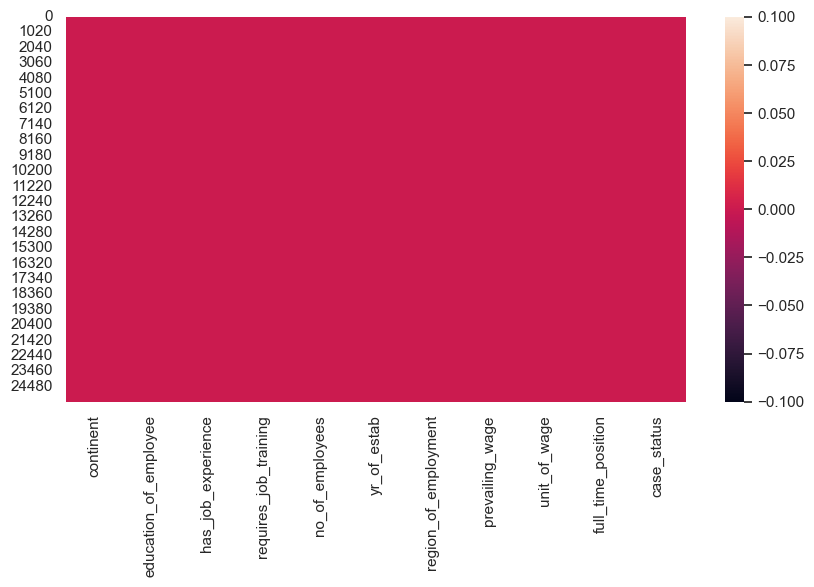

In [1411]:
#checking the null values using heatmap
sns.heatmap(df.isnull())

In [1412]:
#get the percentage in eduction of employees columns
df['education_of_employee'].value_counts(normalize=True)*100

Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64

In [1413]:
# find the percentage of each values
for col in categorial_fearues:
    print(df[col].value_counts(normalize=True)*100)
    print('.'*70)
    

Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
......................................................................
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
......................................................................
Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
......................................................................
N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64
......................................................................
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: region_of_employment, dtype: float64
......................................................................
Year

In [1414]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [1415]:
# ## drop case_id because case_id is not important 
# categorial_fearues.remove('case_id')

In [1416]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Exploratory Data Analysis

In [1417]:
##Univeriant Analysis Numerical fearute
numerical_features 

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

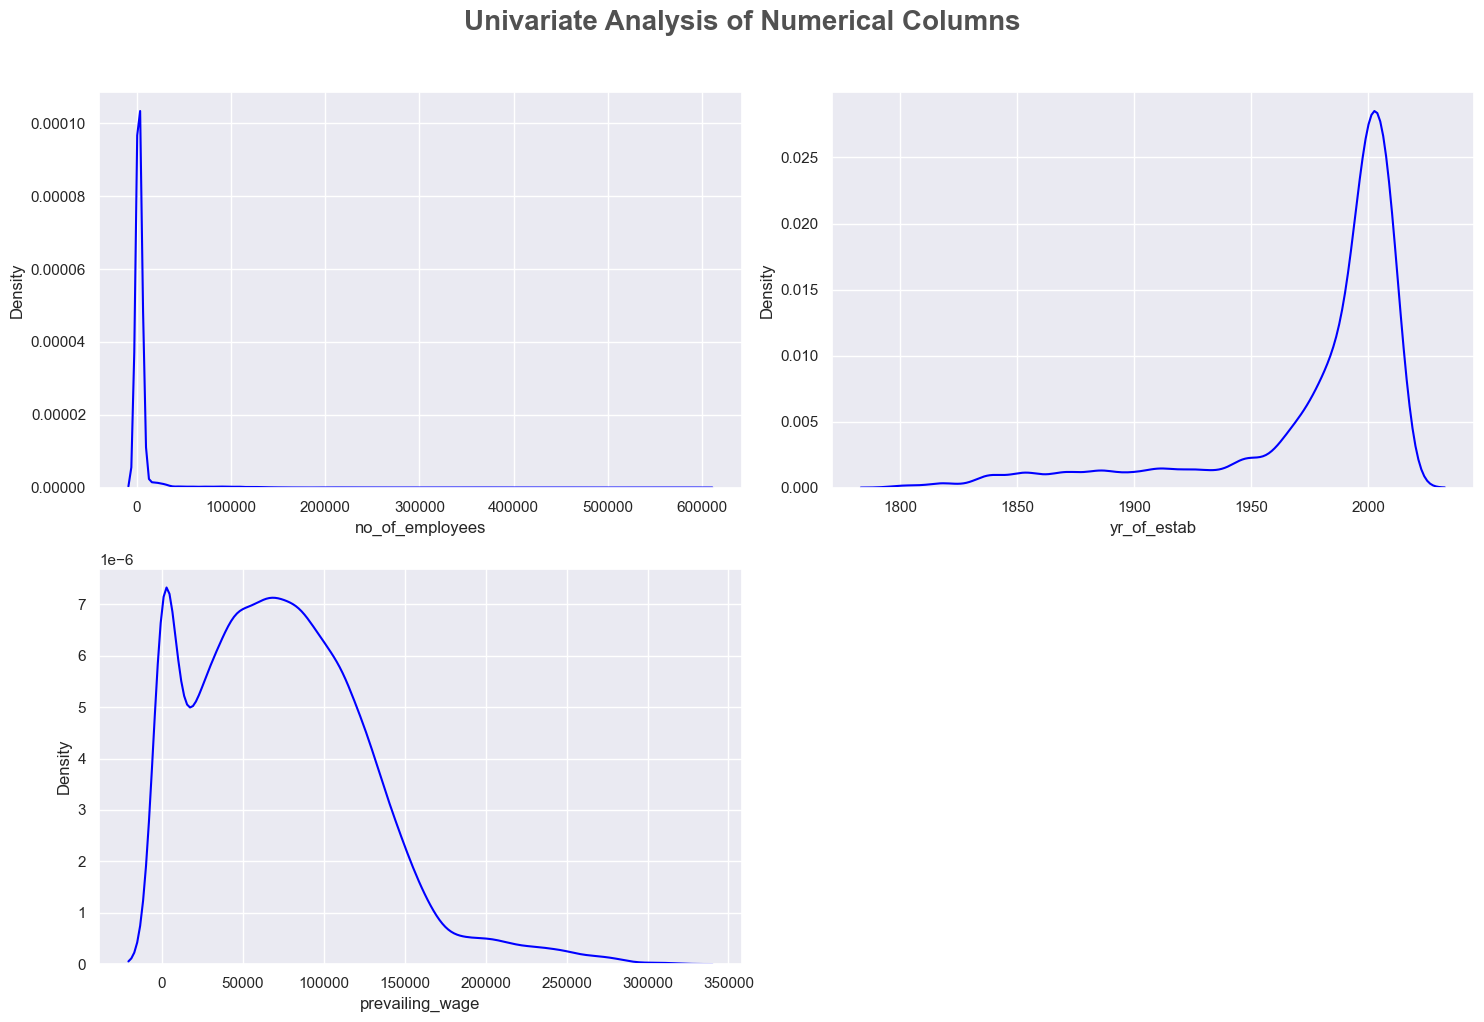

In [1418]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Numerical Columns", fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(numerical_features)):
    plt.subplot(2, 2, i + 1)  # Ensure grid is sufficient for number of plots
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])  # Corrected method name
    plt.tight_layout()

plt.show()

### this char show that the numerical value is not normaliy distributed

In [1419]:
categorial_fearues

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

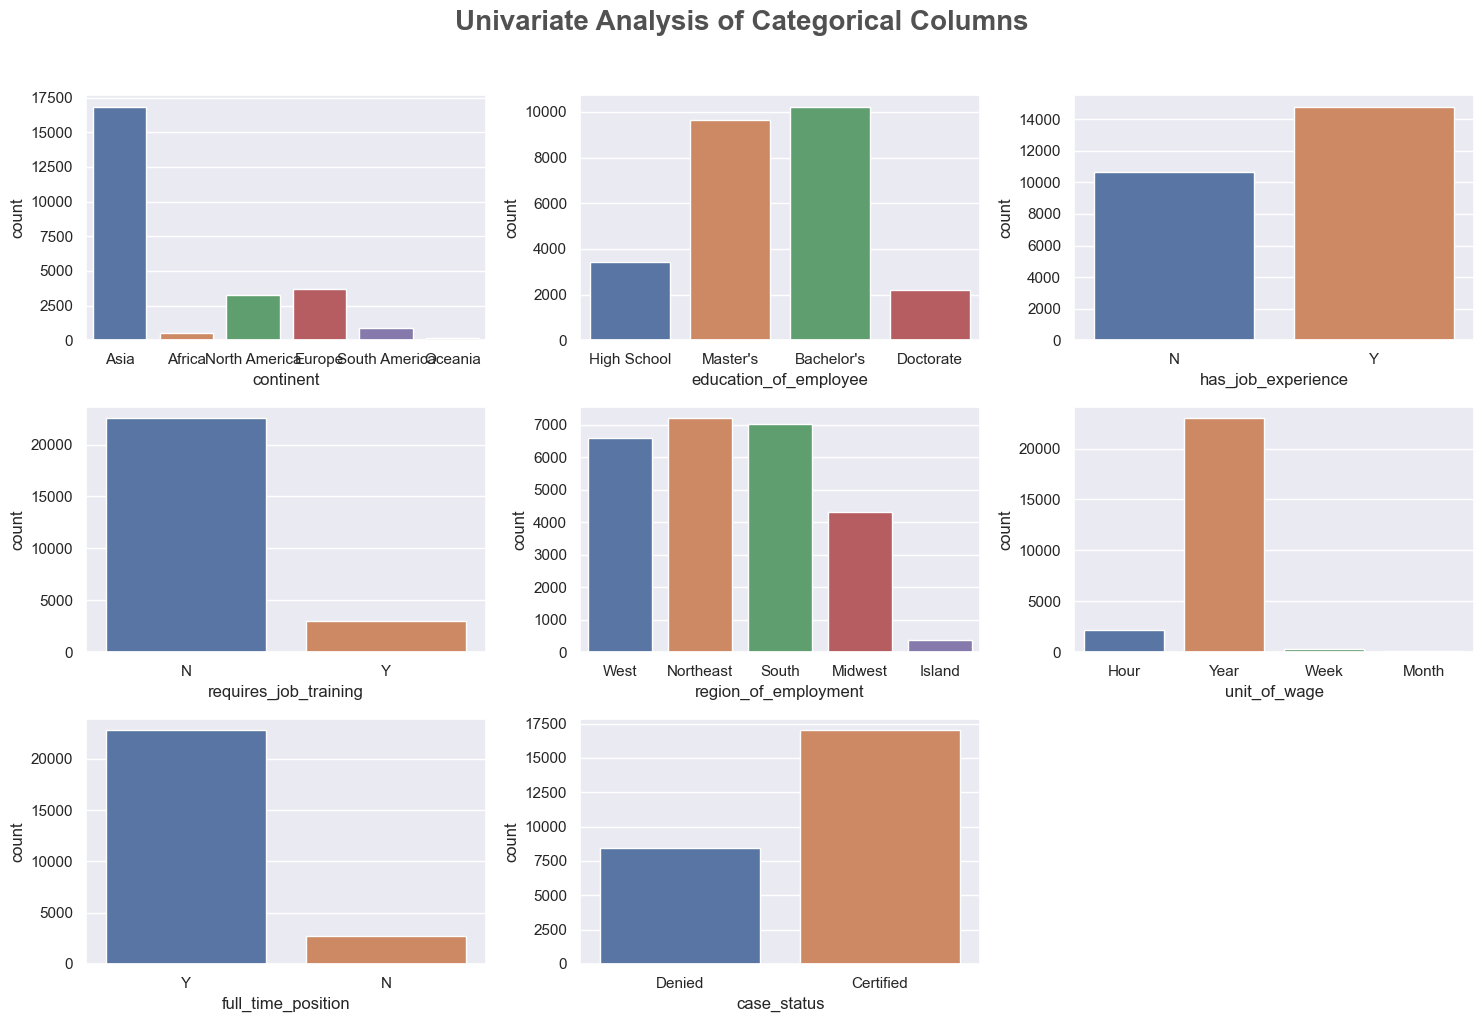

In [1420]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Categorical Columns", fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(categorial_fearues)):
    plt.subplot(3, 3, i + 1)  # Ensure grid is sufficient for number of plots
    sns.countplot(x=df[categorial_fearues[i]])
    plt.xlabel(categorial_fearues[i]) 
    plt.tight_layout()

plt.show()

In [1421]:
## multivariant Analysis
discreate_features=[feature for feature in numerical_features if len(df[feature].unique())<=25]

continues_feature=[feature for feature in numerical_features if len(df[feature].unique())>=25]


In [1422]:
discreate_features

[]

In [1423]:
continues_feature

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [1424]:
df[(list(df.columns)[1:])].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


<Axes: >

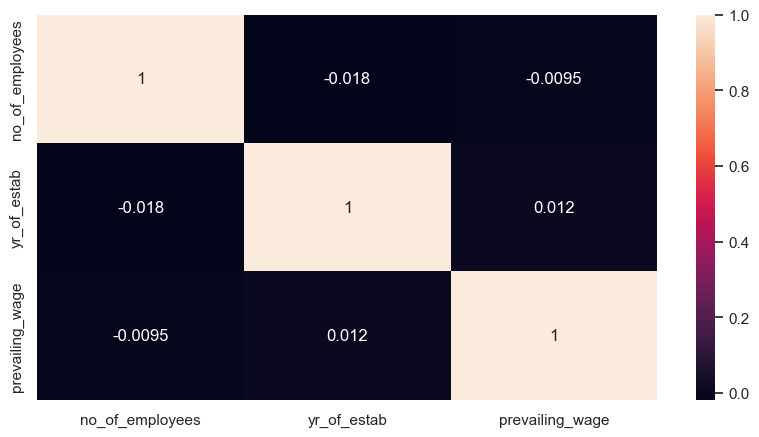

In [1425]:
df1=df.copy()
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True)

### chi2-contingency is used for the chi-square test to determine if two categorical variable are independent

In [1426]:
from scipy.stats import chi2_contingency
chi2_test=[]

for feature in categorial_fearues:
    if chi2_contingency(pd.crosstab(df1['case_status'],df1[feature]))[1]<0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data=[categorial_fearues,chi2_test]).T
result.columns=["Column","Hypothesis"]
result            

,Column,Hypothesis
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


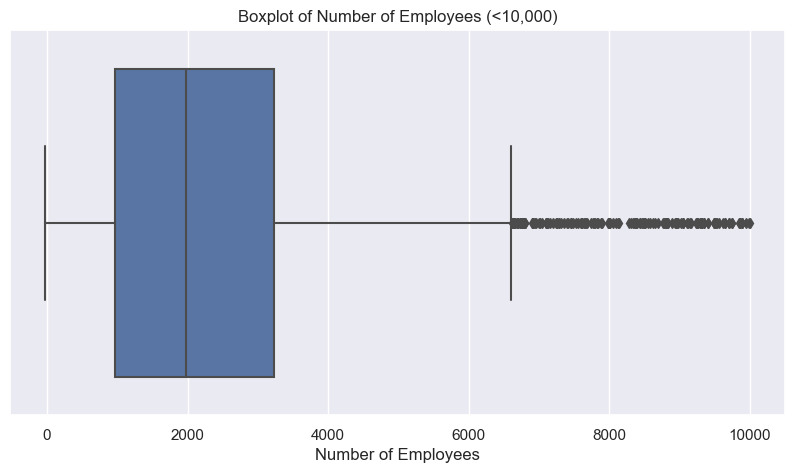

In [1427]:
sns.boxplot(x=df1[df1['no_of_employees'] < 10000]['no_of_employees'])
plt.xlabel("Number of Employees")  # Label for x-axis
plt.title("Boxplot of Number of Employees (<10,000)") 
plt.show()

In [1428]:
df1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


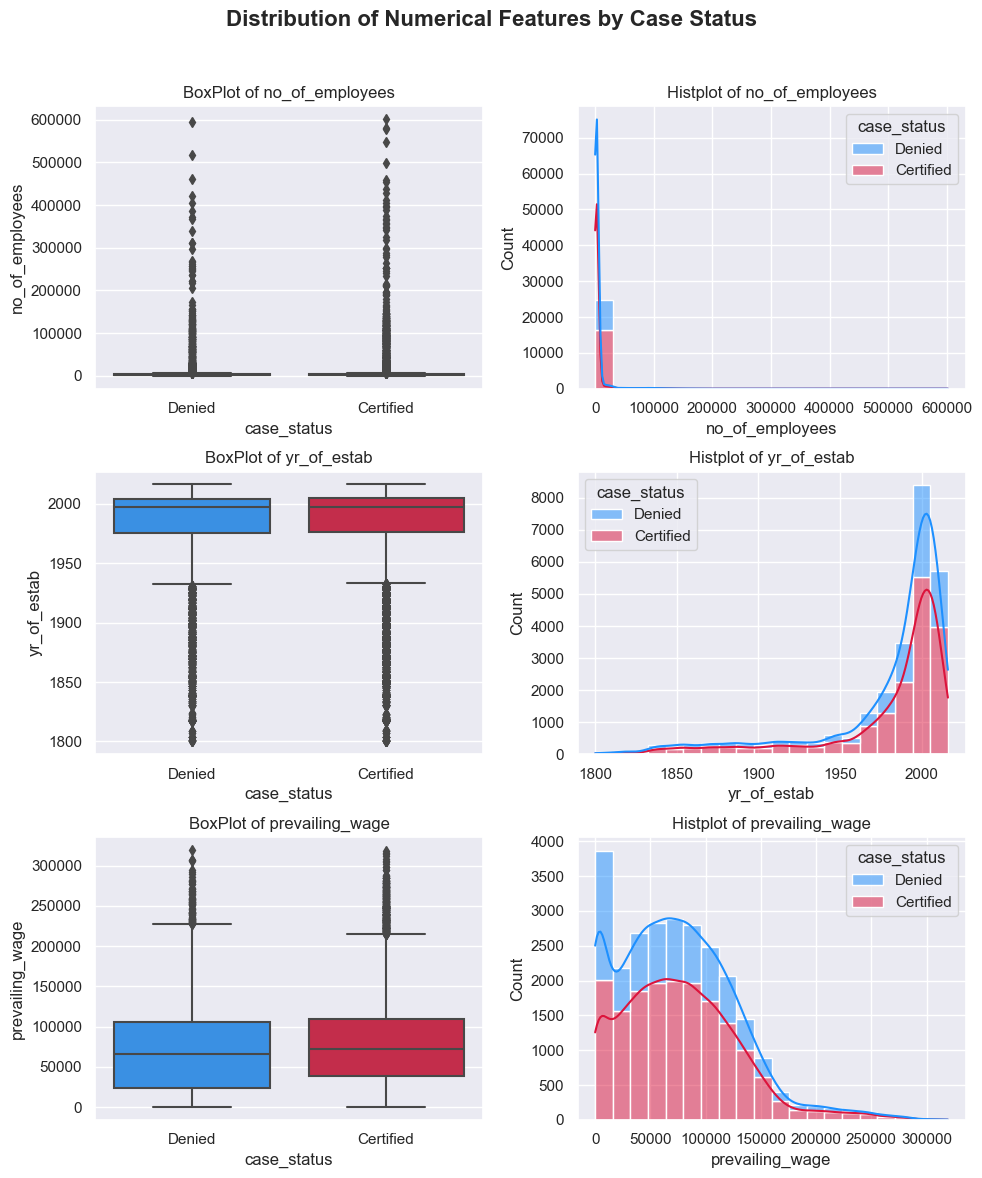

In [1429]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10, 12))  # Create 3x2 subplots
fig.suptitle('Distribution of Numerical Features by Case Status', fontsize=16, fontweight='bold')

for i, col in enumerate(continues_feature):
    sns.boxplot(data=df1, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'BoxPlot of {col}', fontsize=12)
    
    sns.histplot(data=df1, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histplot of {col}', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()


### This charts shows that there is outliers

In [1430]:
percentage = df1.case_status.value_counts(normalize=True)*100
percentage

Certified    66.789639
Denied       33.210361
Name: case_status, dtype: float64

([<matplotlib.patches.Wedge at 0x2191f238690>,
 [Text(-0.9504959274724624, -0.553676342151499, 'Certified'),
  Text(1.0369045350486599, 0.604010749238391, 'Denied')],
 [Text(-0.5184523240758885, -0.30200527753718126, '66.79%'),
  Text(0.604860978778385, 0.3523396037223947, '33.21%')])

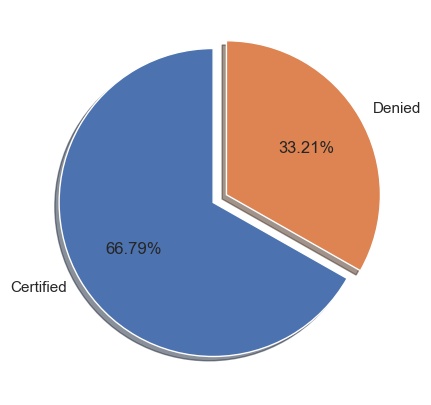

In [1431]:
# Visualized the taget Feature
fig,ax = plt.subplots(figsize=(15,5))
explore=(0,0.1)
ax.pie(percentage,labels=['Certified','Denied'],startangle=90,autopct='%1.2f%%',explode=explore,shadow=True)

In [1432]:
df1.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
continent     case_status             
Africa        Certified      72.050817
              Denied         27.949183
Asia          Certified      65.310480
              Denied         34.689520
Europe        Certified      79.233655
              Denied         20.766345
North America Certified      61.877278
              Denied         38.122722
Oceania       Certified      63.541667
              Denied         36.458333
South America Certified      57.863850
              Denied         42.136150

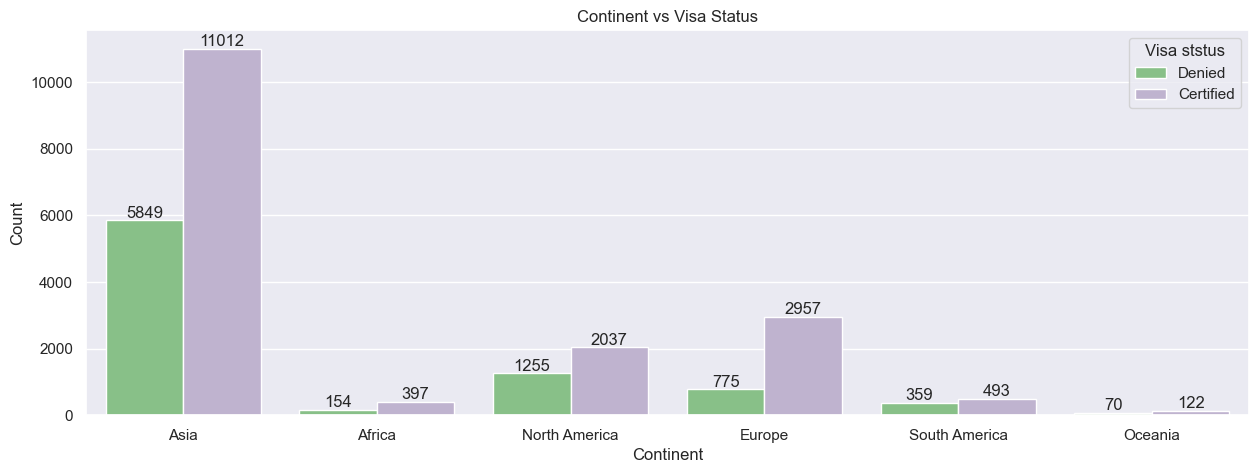

In [1433]:
plt.figure(figsize=(15,5))
ax=sns.countplot(data=df1,x='continent',hue='case_status',palette='Accent')
plt.title("Continent vs Visa Status")
plt.ylabel("Count")
plt.xlabel('Continent')
plt.legend(title='Visa ststus')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [1434]:
df2=df1.copy()
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


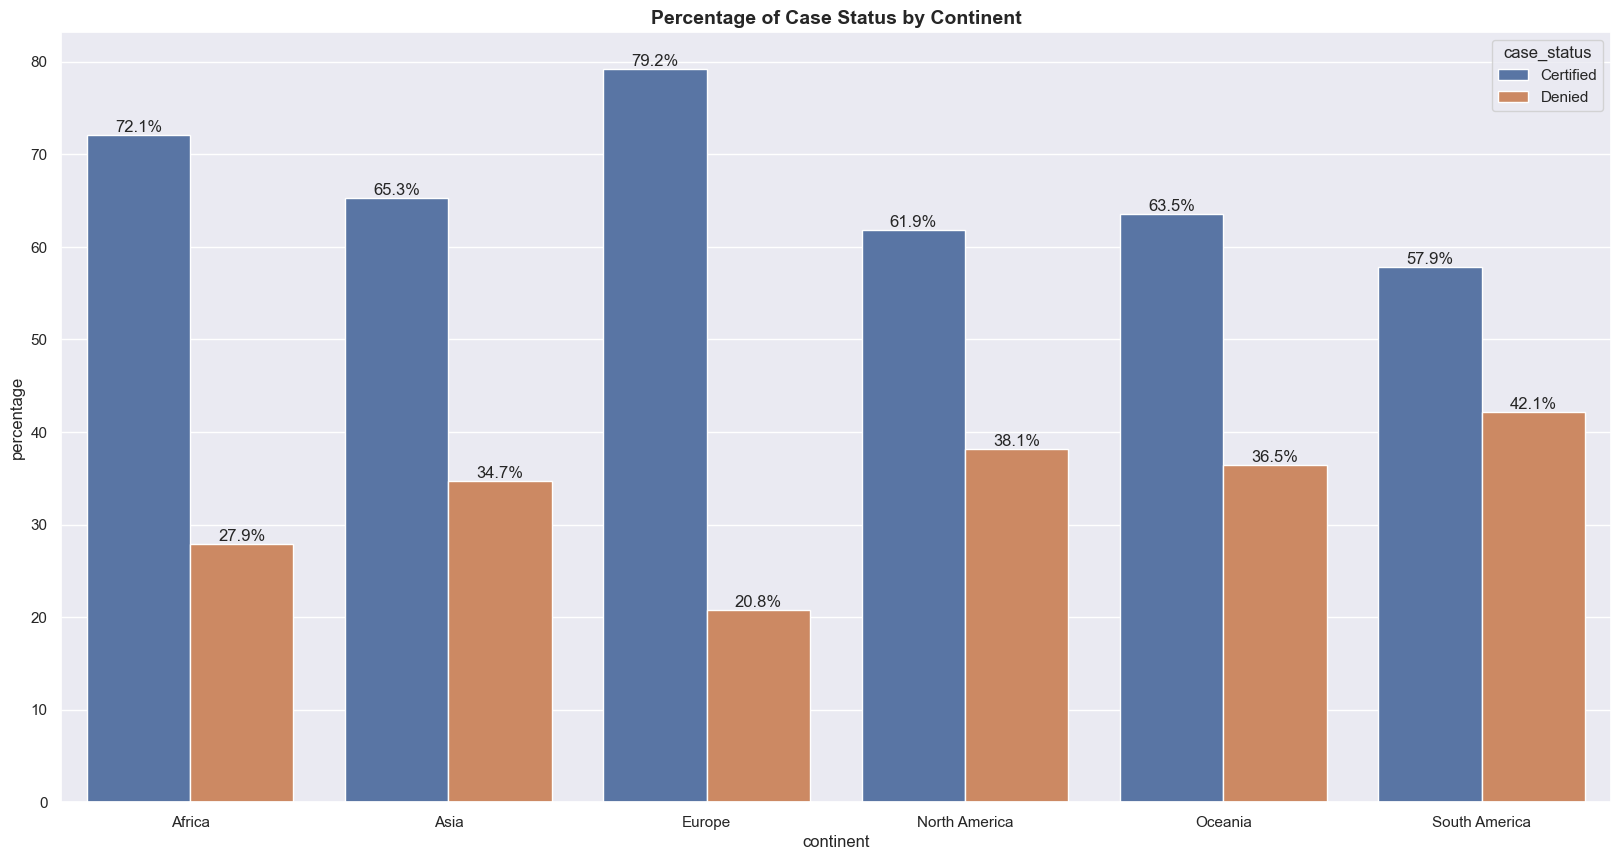

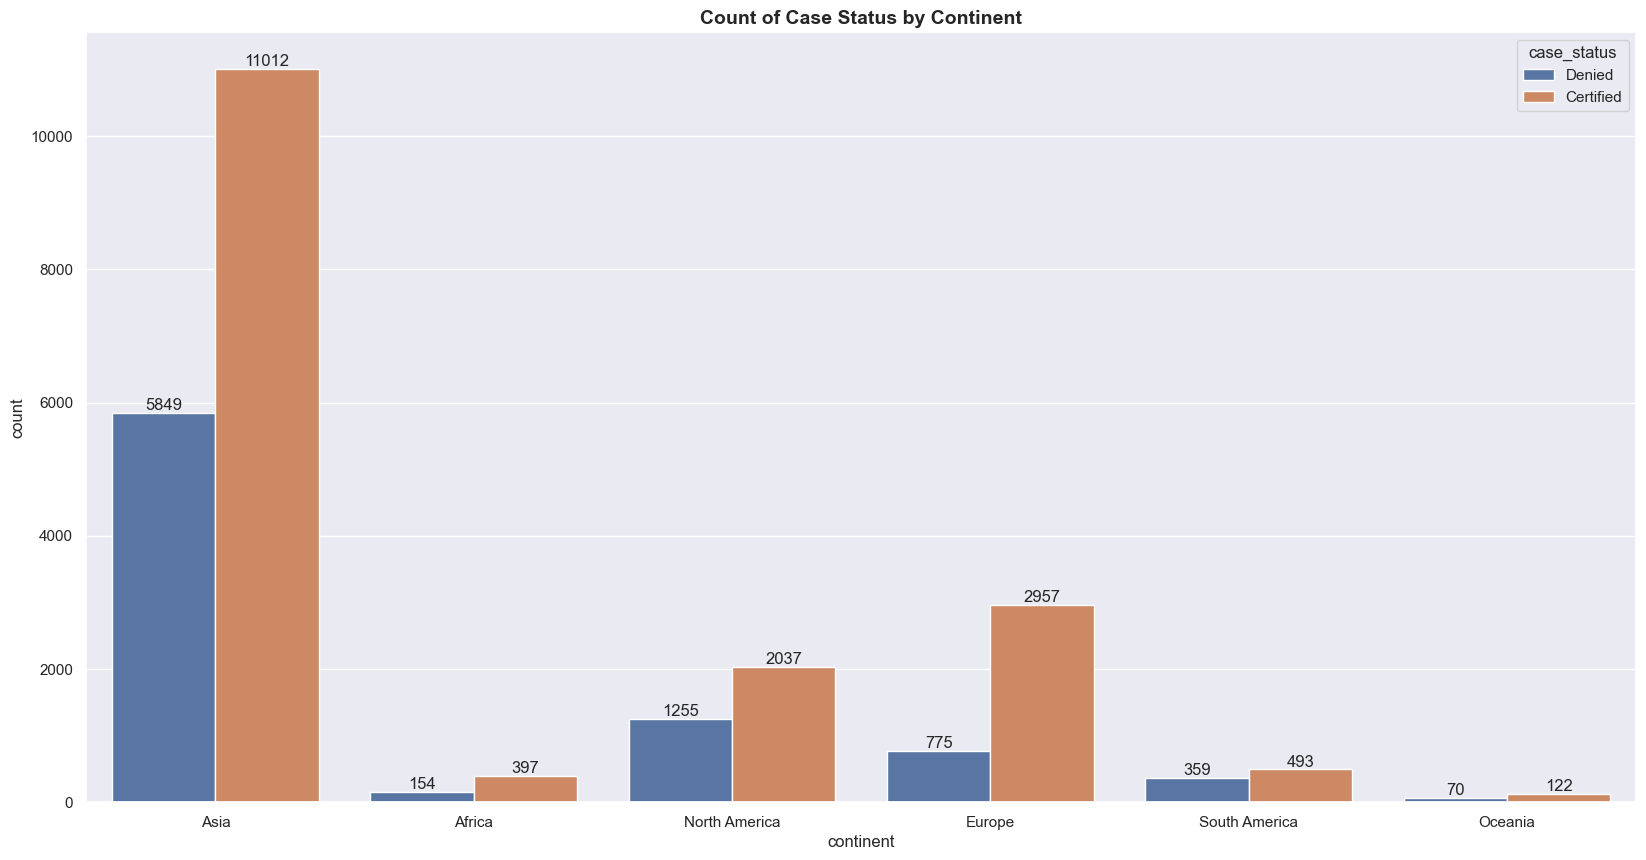

In [1435]:
# Calculate percentage of case_status per continent
percentage = df2.groupby('continent')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

# Set figure size
sns.set(rc={'figure.figsize': (20, 10)})

# Bar plot for percentage of case_status by continent
ax1 = sns.barplot(data=percentage, x='continent', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by Continent', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
plt.figure(figsize=(20, 10))
ax2 = sns.countplot(data=df, x='continent', hue='case_status')
plt.title('Count of Case Status by Continent', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()


In [1436]:
percentage = df2.groupby('education_of_employee')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,education_of_employee,case_status,percentage
0,Bachelor's,Certified,62.214188
1,Bachelor's,Denied,37.785812
2,Doctorate,Certified,87.226277
3,Doctorate,Denied,12.773723
4,High School,Denied,65.964912
5,High School,Certified,34.035088
6,Master's,Certified,78.627777
7,Master's,Denied,21.372223


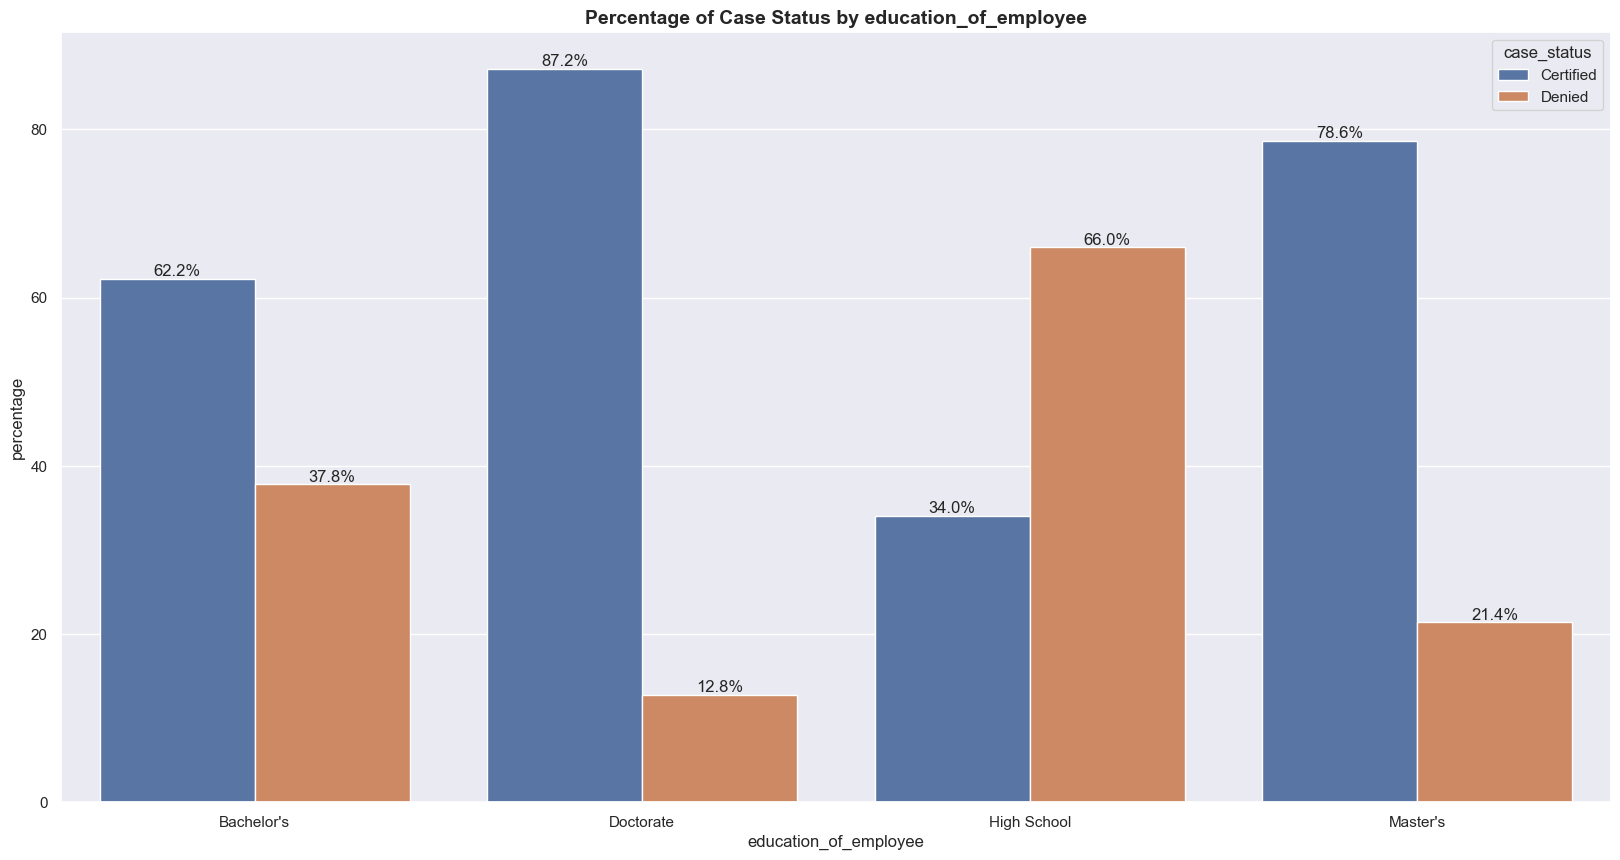

In [1437]:
# Calculate percentage of case_status per education_of_employee
percentage = df2.groupby('education_of_employee')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

# Set figure size
sns.set(rc={'figure.figsize': (20, 10)})

# Bar plot for percentage of case_status by education_of_employee
ax1 = sns.barplot(data=percentage, x='education_of_employee', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by education_of_employee', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
# plt.figure(figsize=(20, 10))
# ax2 = sns.countplot(data=df, x='education_of_employee', hue='case_status')
# plt.title('Count of Case Status by education_of_employee', fontsize=14, fontweight='bold')

# # Add count labels
# for bars in ax2.containers:
#     ax2.bar_label(bars)

# plt.show()


In [1438]:
# Calculate percentage of case_status per has_job_experience
percentage = df2.groupby('has_job_experience')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,has_job_experience,case_status,percentage
0,N,Certified,56.134108
1,N,Denied,43.865892
2,Y,Certified,74.476422
3,Y,Denied,25.523578


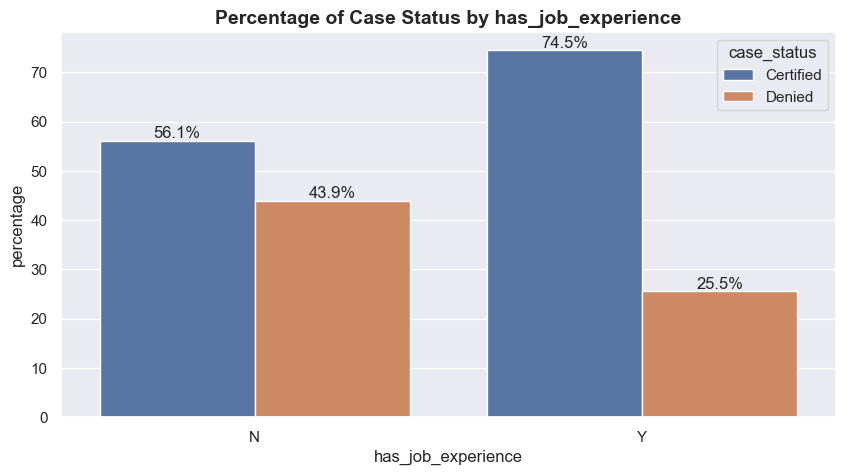

In [1439]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by has_job_experience
ax1 = sns.barplot(data=percentage, x='has_job_experience', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by has_job_experience', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

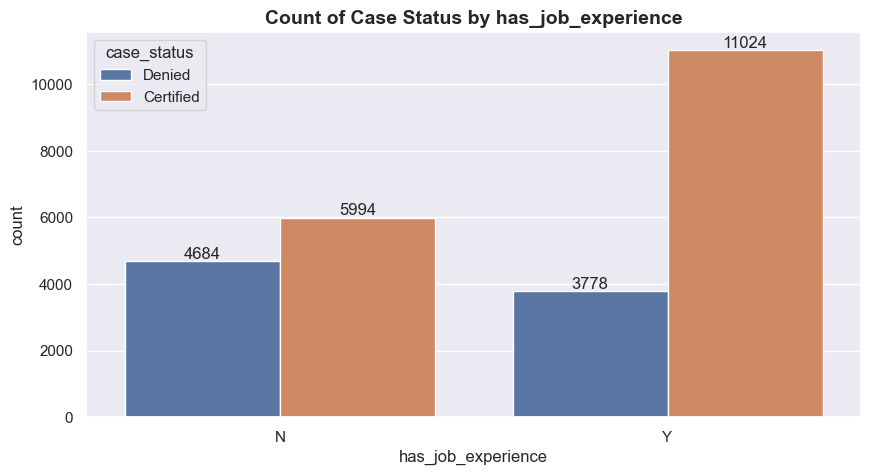

In [1440]:
#Count plot for raw case counts
plt.figure(figsize=(10, 5))
ax2 = sns.countplot(data=df2, x='has_job_experience', hue='case_status')
plt.title('Count of Case Status by has_job_experience', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()

In [1441]:
# Calculate percentage of case_status per requires_job_training
percentage = df2.groupby('requires_job_training')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,requires_job_training,case_status,percentage
0,N,Certified,66.645949
1,N,Denied,33.354051
2,Y,Certified,67.884941
3,Y,Denied,32.115059


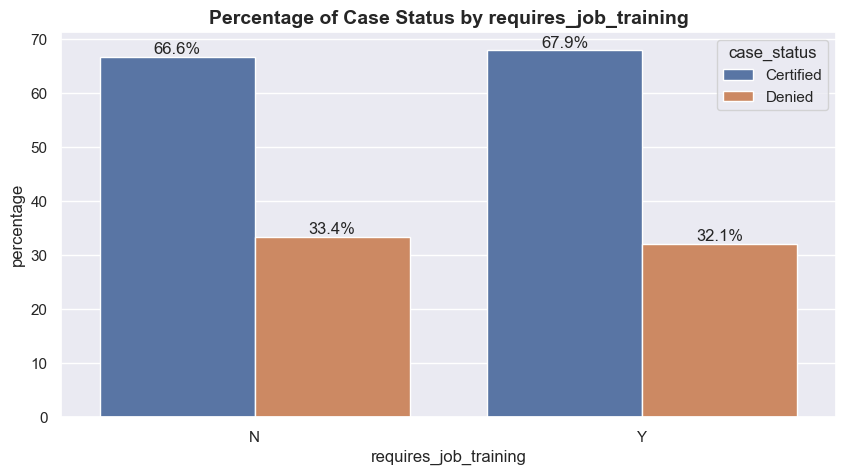

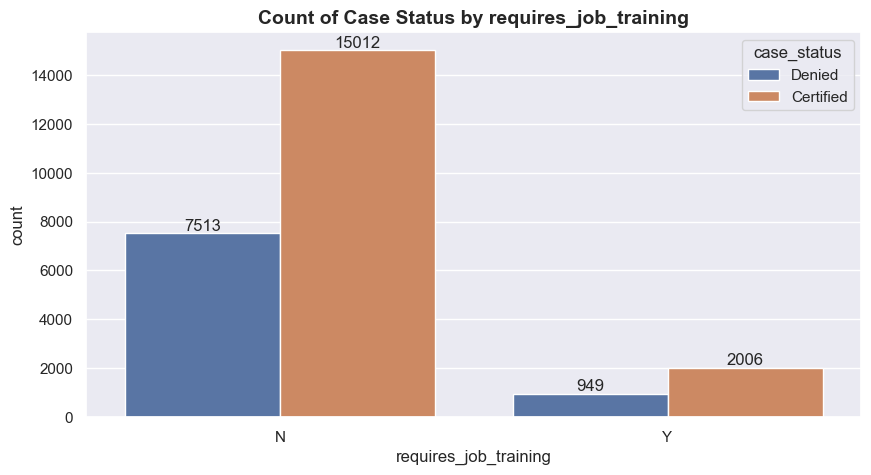

In [1442]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by requires_job_training
ax1 = sns.barplot(data=percentage, x='requires_job_training', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by requires_job_training', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
plt.figure(figsize=(10, 5))
ax2 = sns.countplot(data=df2, x='requires_job_training', hue='case_status')
plt.title('Count of Case Status by requires_job_training', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()


In [1443]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


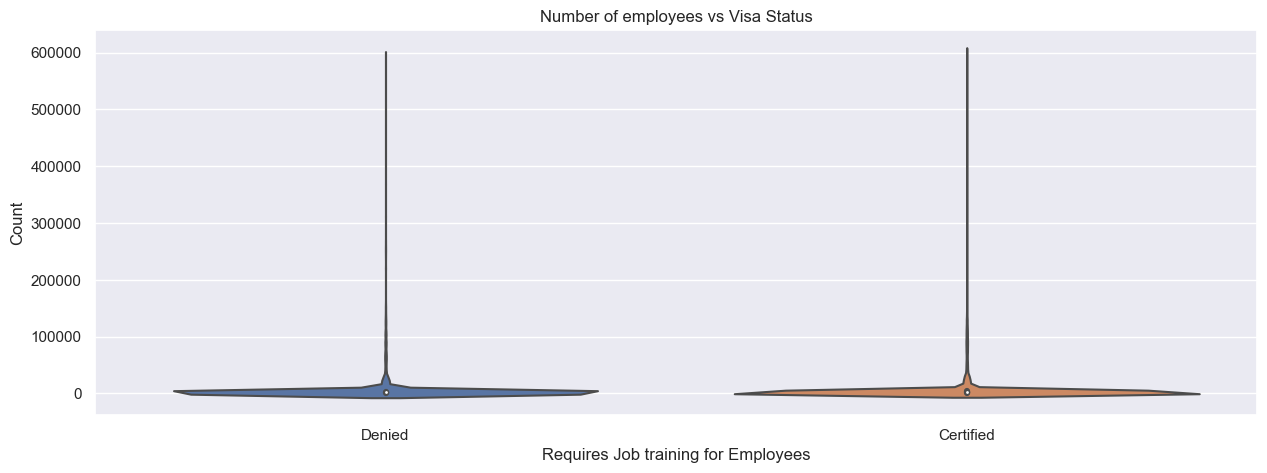

In [1444]:
plt.figure(figsize=(15,5))
sns.violinplot(x='case_status',y='no_of_employees',data=df2,paletter='Accent')
plt.title("Number of employees vs Visa Status")
plt.ylabel("Count")
plt.xlabel("Requires Job training for Employees")
plt.show()

In [1445]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [1446]:
percentage = df2.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,unit_of_wage,case_status,percentage
0,Hour,Denied,65.368567
1,Hour,Certified,34.631433
2,Month,Certified,61.797753
3,Month,Denied,38.202247
4,Week,Certified,62.132353
5,Week,Denied,37.867647
6,Year,Certified,69.885027
7,Year,Denied,30.114973


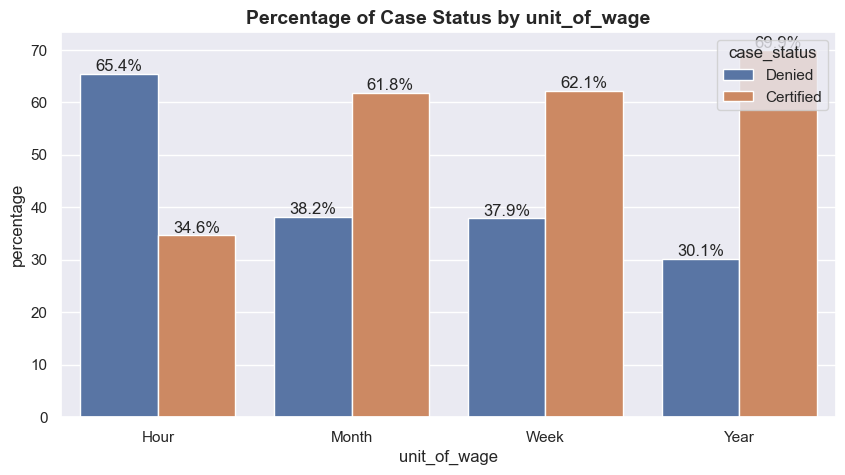

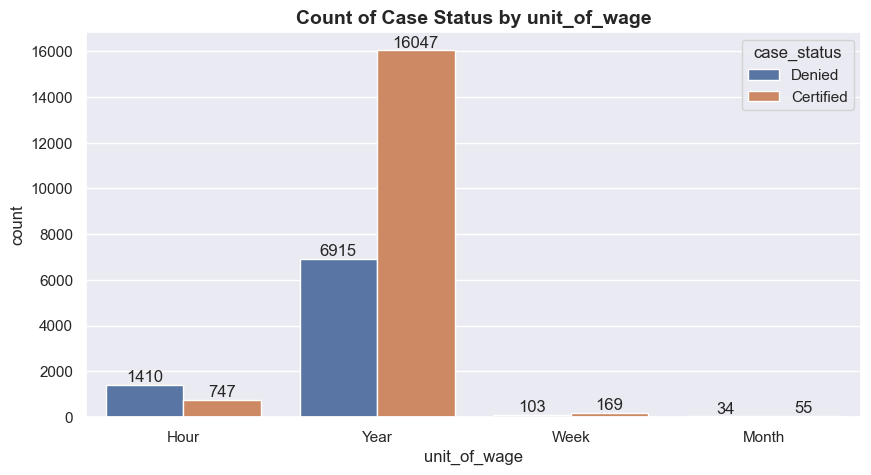

In [1447]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by unit_of_wage
ax1 = sns.barplot(data=percentage, x='unit_of_wage', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by unit_of_wage', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
plt.figure(figsize=(10, 5))
ax2 = sns.countplot(data=df2, x='unit_of_wage', hue='case_status')
plt.title('Count of Case Status by unit_of_wage', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()


In [1448]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [1449]:
percentage = df2.groupby('region_of_employment')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,region_of_employment,case_status,percentage
0,Island,Certified,60.266667
1,Island,Denied,39.733333
2,Midwest,Certified,75.528210
3,Midwest,Denied,24.471790
4,Northeast,Certified,62.904795
5,Northeast,Denied,37.095205
6,South,Certified,70.015676
7,South,Denied,29.984324
8,West,Certified,62.253265
9,West,Denied,37.746735


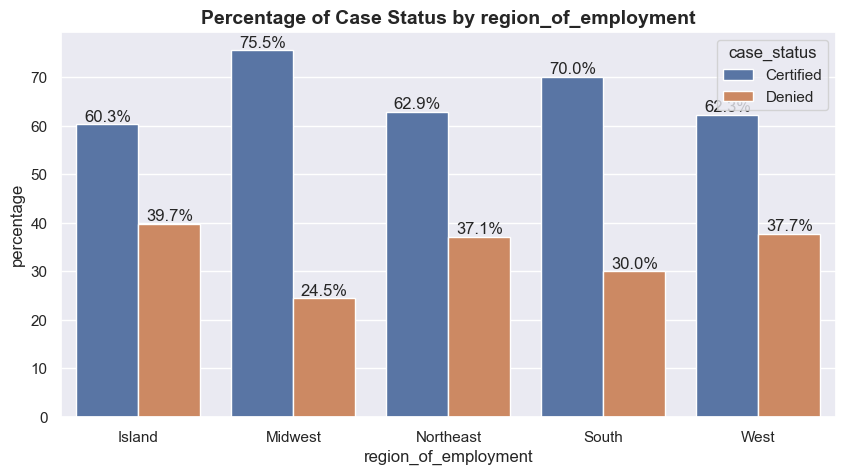

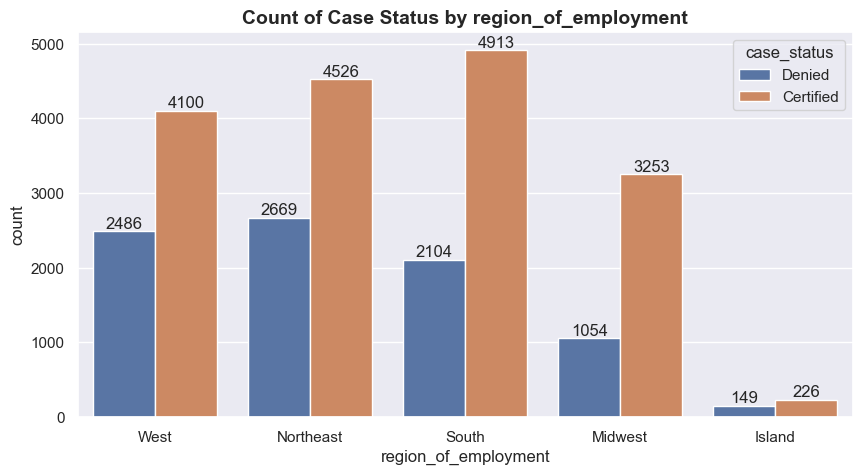

In [1450]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by region_of_employment
ax1 = sns.barplot(data=percentage, x='region_of_employment', y='percentage', hue='case_status')
plt.title('Percentage of Case Status by region_of_employment', fontsize=14, fontweight='bold')

# Add value labels
for bars in ax1.containers:
    ax1.bar_label(bars, fmt="%.1f%%")  # Show percentages

plt.show()

# Count plot for raw case counts
plt.figure(figsize=(10, 5))
ax2 = sns.countplot(data=df2, x='region_of_employment', hue='case_status')
plt.title('Count of Case Status by region_of_employment', fontsize=14, fontweight='bold')

# Add count labels
for bars in ax2.containers:
    ax2.bar_label(bars)

plt.show()


In [1451]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [1452]:
percentage = df2.groupby('prevailing_wage')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
percentage

,prevailing_wage,case_status,percentage
0,2.1367,Certified,100.0
1,2.9561,Denied,100.0
2,3.0031,Denied,100.0
3,3.3188,Denied,100.0
4,3.4889,Certified,100.0
...,...,...,...
25457,311734.4900,Certified,100.0
25458,314156.0600,Certified,100.0
25459,315497.6000,Certified,100.0
25460,318446.0500,Certified,100.0


Text(0, 0.5, 'Count')

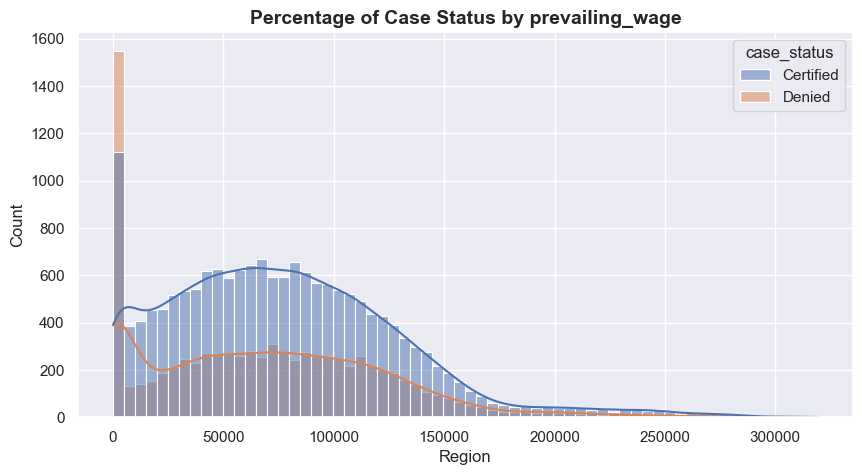

In [1453]:

# Set figure size
sns.set(rc={'figure.figsize': (10, 5)})

# Bar plot for percentage of case_status by prevailing_wage
ax1 = sns.histplot(data=percentage, x='prevailing_wage', hue='case_status',kde=True)
plt.title('Percentage of Case Status by prevailing_wage', fontsize=14, fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Count")

In [1454]:
value = df2.groupby('education_of_employee')['prevailing_wage'].mean().sort_values(ascending=False).to_frame()
value


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


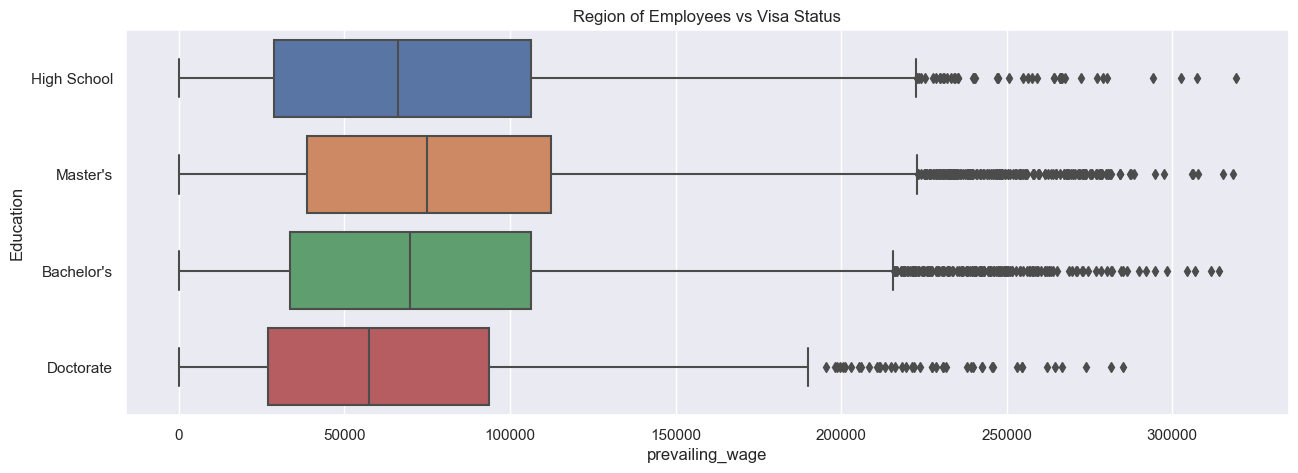

In [1455]:
plt.figure(figsize=(15,5))
sns.boxplot(x='prevailing_wage',y='education_of_employee',data=df2)
plt.title("Region of Employees vs Visa Status")
plt.ylabel("Education")
plt.xlabel("prevailing_wage")
plt.show()

In [1456]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [1457]:
value = df2.groupby('has_job_experience')['prevailing_wage'].mean().sort_values(ascending=False).to_frame()
value


,prevailing_wage
has_job_experience,
N,75464.159920
Y,73728.405363


In [1458]:
value = df2.groupby('continent')['prevailing_wage'].mean().sort_values(ascending=False).to_frame()
value


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


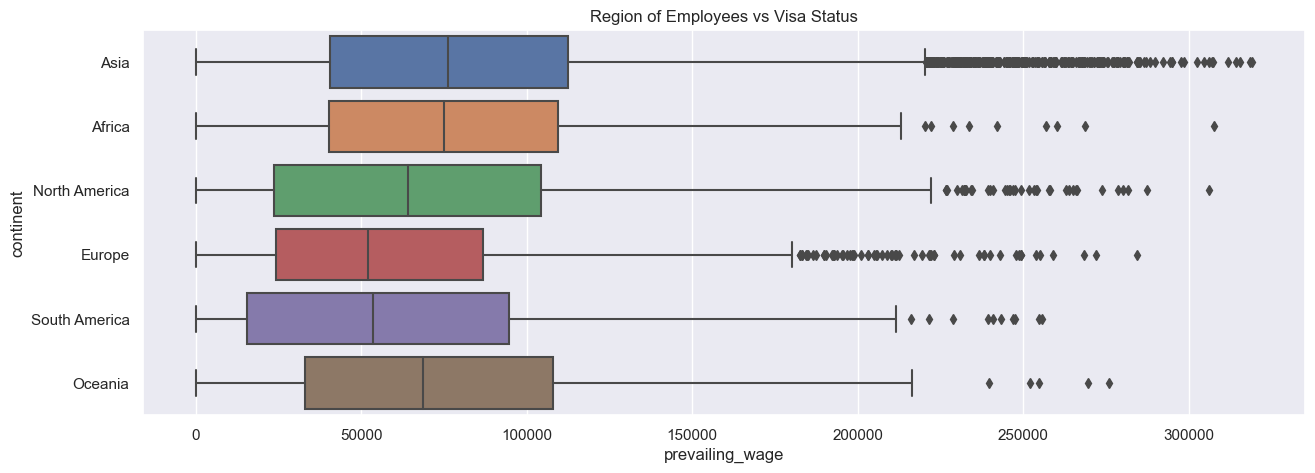

In [1459]:
plt.figure(figsize=(15,5))
sns.boxplot(x='prevailing_wage',y='continent',data=df2)
plt.title("Region of Employees vs Visa Status")
plt.ylabel("continent")
plt.xlabel("prevailing_wage")
plt.show()

In [1460]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


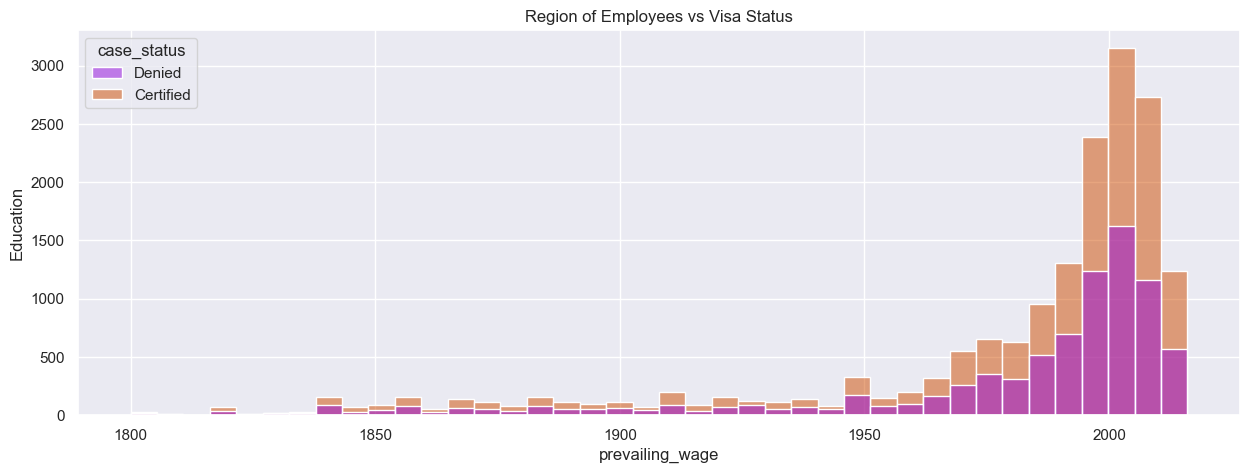

In [1461]:
plt.figure(figsize=(15,5))
sns.histplot(x='yr_of_estab',hue='case_status',data=df2,bins=40,palette='gnuplot')
plt.title("Region of Employees vs Visa Status")
plt.ylabel("Education")
plt.xlabel("prevailing_wage")
plt.show()

### Final Report 
#### Reuired_job_traning columns can be dropped as it doesn't have much impact to taget variable proved in visualization and ch2 test
#### no of Employee , prevailing wage : Columns have outlier which should be handled 
#### continent columns has few unique values with very less count which can be made as others
#### target column case_status a imbalanced can be handled before model building

# outliner handling

In [1462]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [1463]:
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [1464]:
# droping the unnesessory columns
df2.drop(columns=['requires_job_training'],inplace=True)


In [1465]:
df2.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,1082,2005,South,149907.3900,Year,Y,Certified


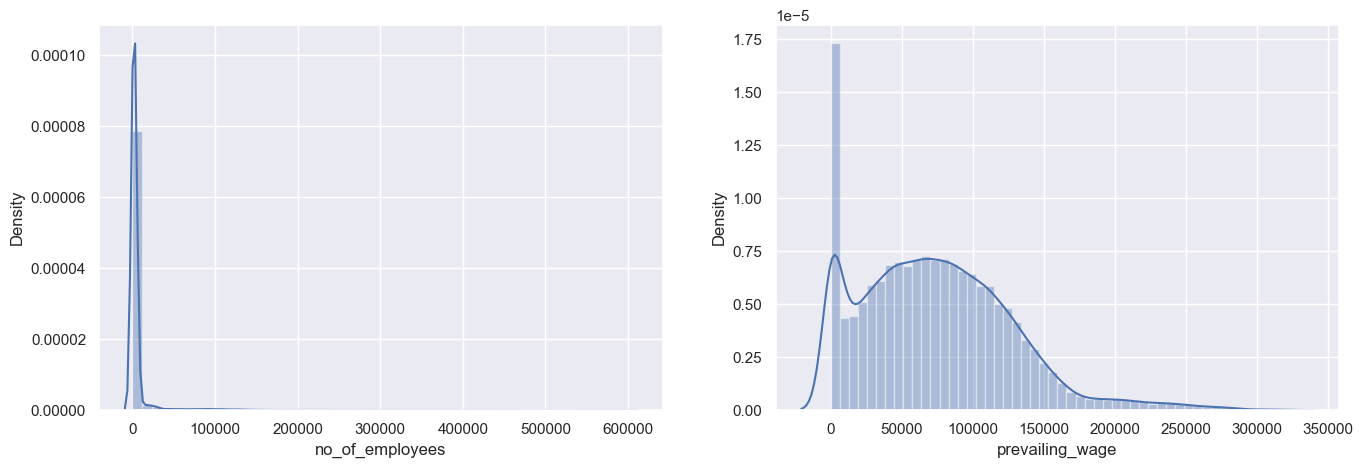

In [1466]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['no_of_employees'])

plt.subplot(1,2,2)
sns.distplot(df2['prevailing_wage'])

plt.show()

In [1467]:
df2['no_of_employees'].describe()

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [1468]:
df2['prevailing_wage'].describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

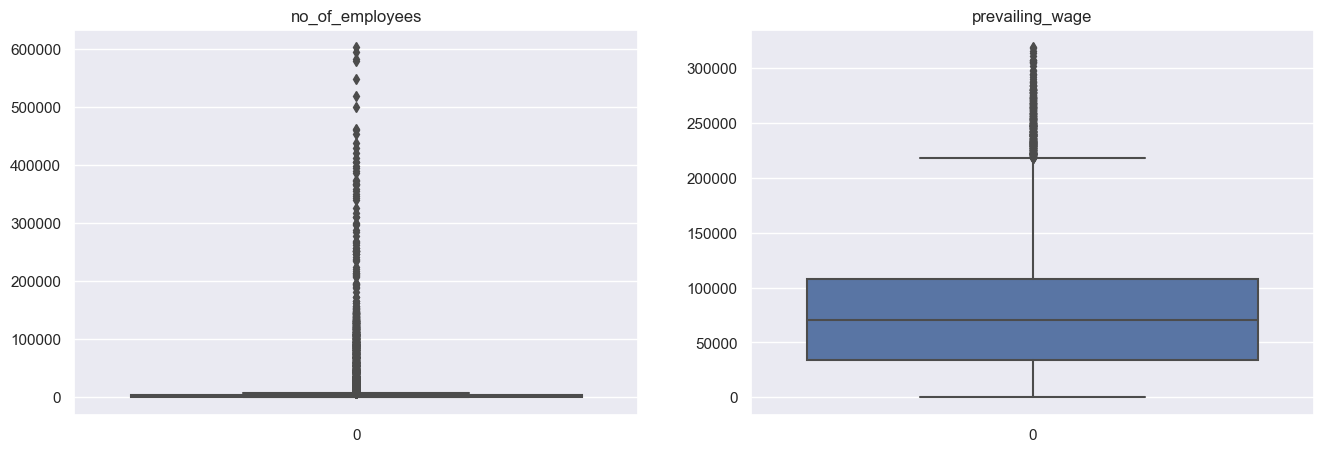

In [1469]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df2['no_of_employees'])
plt.title("no_of_employees")

plt.subplot(1,2,2)
sns.boxplot(df2['prevailing_wage'])
plt.title("prevailing_wage")

plt.show()

In [1470]:
# Finding the IQR
percentile25_no_of_employees = df2['no_of_employees'].quantile(0.25)
percentile75_no_of_employees = df2['no_of_employees'].quantile(0.75)

In [1471]:
percentile25_no_of_employees 


1022.0

In [1472]:
percentile75_no_of_employees 

3504.0

In [1473]:
# Finding the IQR
percentile25_prevailing_wage = df2['prevailing_wage'].quantile(0.25)
percentile75_prevailing_wage = df2['prevailing_wage'].quantile(0.75)

In [1474]:
percentile25_prevailing_wage

34015.479999999996

In [1475]:
percentile75_prevailing_wage

107735.51250000001

In [1476]:
iqr_no_of_employees = percentile75_no_of_employees - percentile25_no_of_employees
iqr_no_of_employees

2482.0

In [1477]:
iqr_prevailing_wage = percentile75_prevailing_wage - percentile25_prevailing_wage
iqr_prevailing_wage

73720.03250000002

In [1478]:
upper_limit_no_of_employees = percentile75_no_of_employees + 1.5 * iqr_no_of_employees
lower_limit_no_of_employees = percentile25_no_of_employees - 1.5 * iqr_no_of_employees

In [1479]:
upper_limit_prevailing_wage = percentile75_prevailing_wage + 1.5 * iqr_prevailing_wage
lower_limit_prevailing_wage = percentile25_prevailing_wage - 1.5 * iqr_prevailing_wage

In [1480]:
print("Upper limit",upper_limit_no_of_employees)
print("Lower limit",lower_limit_no_of_employees)

Upper limit 7227.0
Lower limit -2701.0


In [1481]:
print("Upper limit",upper_limit_prevailing_wage)
print("Lower limit",lower_limit_prevailing_wage)

Upper limit 218315.56125000003
Lower limit -76564.56875000002


## Finding Outliners

In [1482]:
df2[df2['no_of_employees'] > upper_limit_no_of_employees]

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,14513,2007,West,592.2029,Hour,Y,Denied
2,Asia,Bachelor's,N,44444,2008,West,122996.8600,Year,Y,Denied
12,Asia,Bachelor's,Y,123876,1963,Northeast,28663.0500,Year,Y,Certified
14,Asia,Master's,Y,15756,2006,South,220081.7300,Year,Y,Certified
16,Europe,Master's,Y,76638,1991,Midwest,3706.7900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...
25441,Asia,Master's,N,28199,1988,Northeast,97906.7600,Year,Y,Certified
25443,Africa,Bachelor's,N,72892,2007,Northeast,215.1000,Hour,Y,Certified
25455,South America,Bachelor's,N,24335,1993,Midwest,97393.4900,Year,Y,Certified
25464,Asia,Master's,N,48785,1974,South,145102.3600,Year,N,Certified


In [1483]:
df2[df2['no_of_employees'] < lower_limit_no_of_employees]

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [1484]:
df2[df2['prevailing_wage'] > upper_limit_prevailing_wage]

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,Asia,Master's,Y,15756,2006,South,220081.73,Year,Y,Certified
34,Asia,Master's,N,1809,2010,South,225569.73,Year,N,Certified
130,South America,High School,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,Asia,Master's,Y,1515,2001,Midwest,269321.68,Year,N,Certified
221,North America,Doctorate,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...
25191,Asia,Master's,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,North America,Master's,Y,47,2001,South,234308.77,Year,N,Certified
25468,Asia,Bachelor's,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,North America,Master's,Y,2261,1997,Northeast,273772.47,Year,N,Certified


In [1485]:
df2[df2['prevailing_wage'] < lower_limit_prevailing_wage]

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


## Trimming

In [1486]:
new_df_no_of_employees=df2[df2['no_of_employees'] < upper_limit_no_of_employees]

In [1487]:
df2.shape

(25480, 10)

In [1488]:
new_df_no_of_employees.shape

(23924, 10)

In [1489]:
new_df_prevailing_wage=df[df['prevailing_wage'] < upper_limit_prevailing_wage]

In [1490]:
new_df_prevailing_wage.shape

(25053, 11)

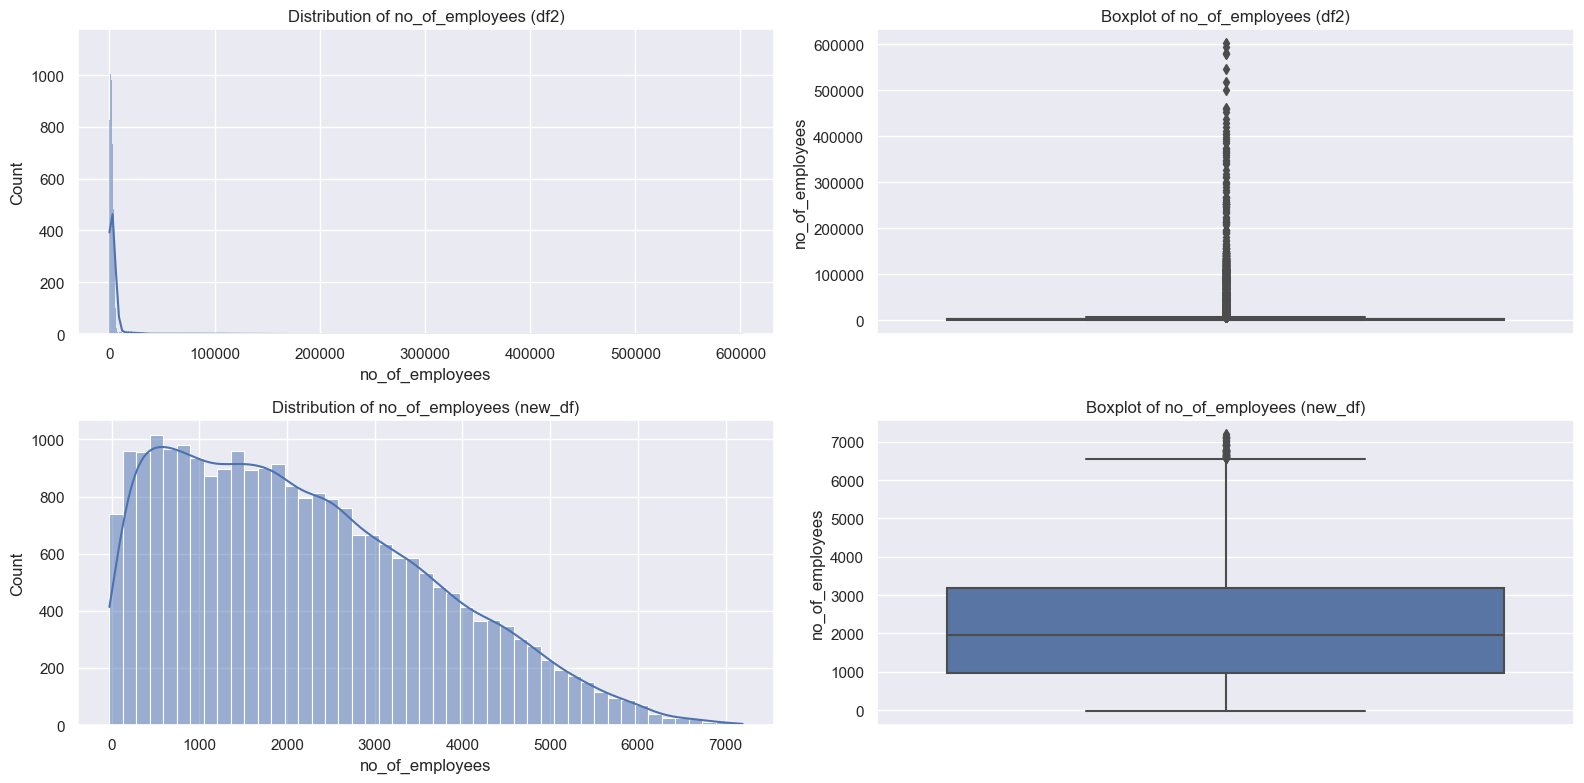

In [1491]:

plt.figure(figsize=(16, 8))

# First dataset - Histogram
plt.subplot(2, 2, 1)
sns.histplot(df2['no_of_employees'], kde=True)
plt.title("Distribution of no_of_employees (df2)")

# First dataset - Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df2['no_of_employees'])
plt.title("Boxplot of no_of_employees (df2)")

# Second dataset - Histogram
plt.subplot(2, 2, 3)
sns.histplot(new_df_no_of_employees['no_of_employees'], kde=True)
plt.title("Distribution of no_of_employees (new_df)")

# Second dataset - Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(y=new_df_no_of_employees['no_of_employees'])
plt.title("Boxplot of no_of_employees (new_df)")

plt.tight_layout()
plt.show()


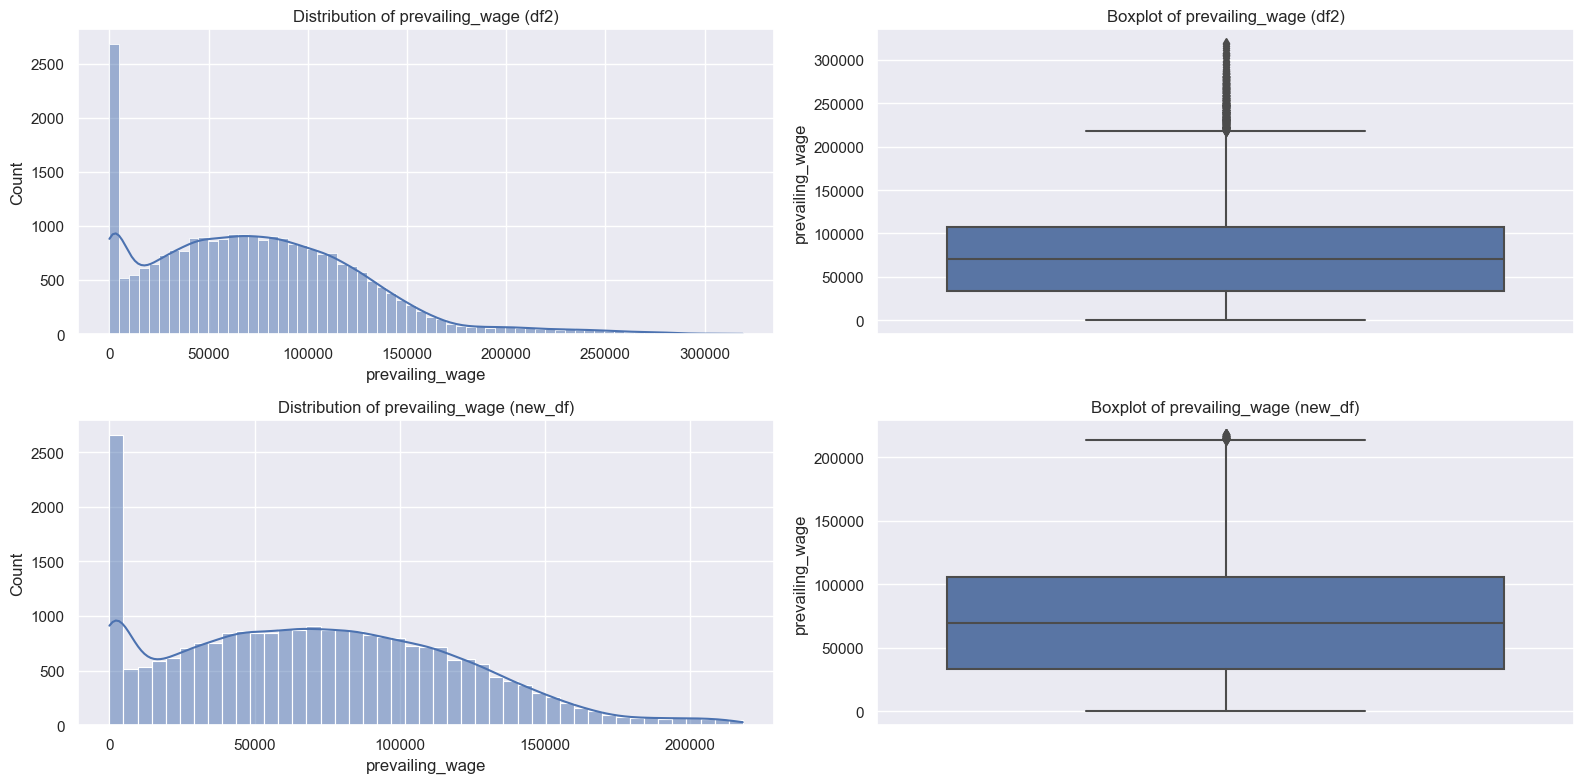

In [1492]:

plt.figure(figsize=(16, 8))

# First dataset - Histogram
plt.subplot(2, 2, 1)
sns.histplot(df2['prevailing_wage'], kde=True)
plt.title("Distribution of prevailing_wage (df2)")

# First dataset - Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df2['prevailing_wage'])
plt.title("Boxplot of prevailing_wage (df2)")

# Second dataset - Histogram
plt.subplot(2, 2, 3)
sns.histplot(new_df_prevailing_wage['prevailing_wage'], kde=True)
plt.title("Distribution of prevailing_wage (new_df)")

# Second dataset - Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(y=new_df_prevailing_wage['prevailing_wage'])
plt.title("Boxplot of prevailing_wage (new_df)")

plt.tight_layout()
plt.show()


## Capping

In [1493]:
df3 = df2.copy()

df3['no_of_employees'] = np.where(
    df3['no_of_employees'] > upper_limit_no_of_employees,
    upper_limit_no_of_employees,
    np.where(
        df3['no_of_employees'] < lower_limit_no_of_employees,
        lower_limit_no_of_employees,
        df3['no_of_employees']
    )
)

In [1494]:
df3.shape

(25480, 10)

In [1495]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   no_of_employees        25480 non-null  float64
 4   yr_of_estab            25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.9+ MB


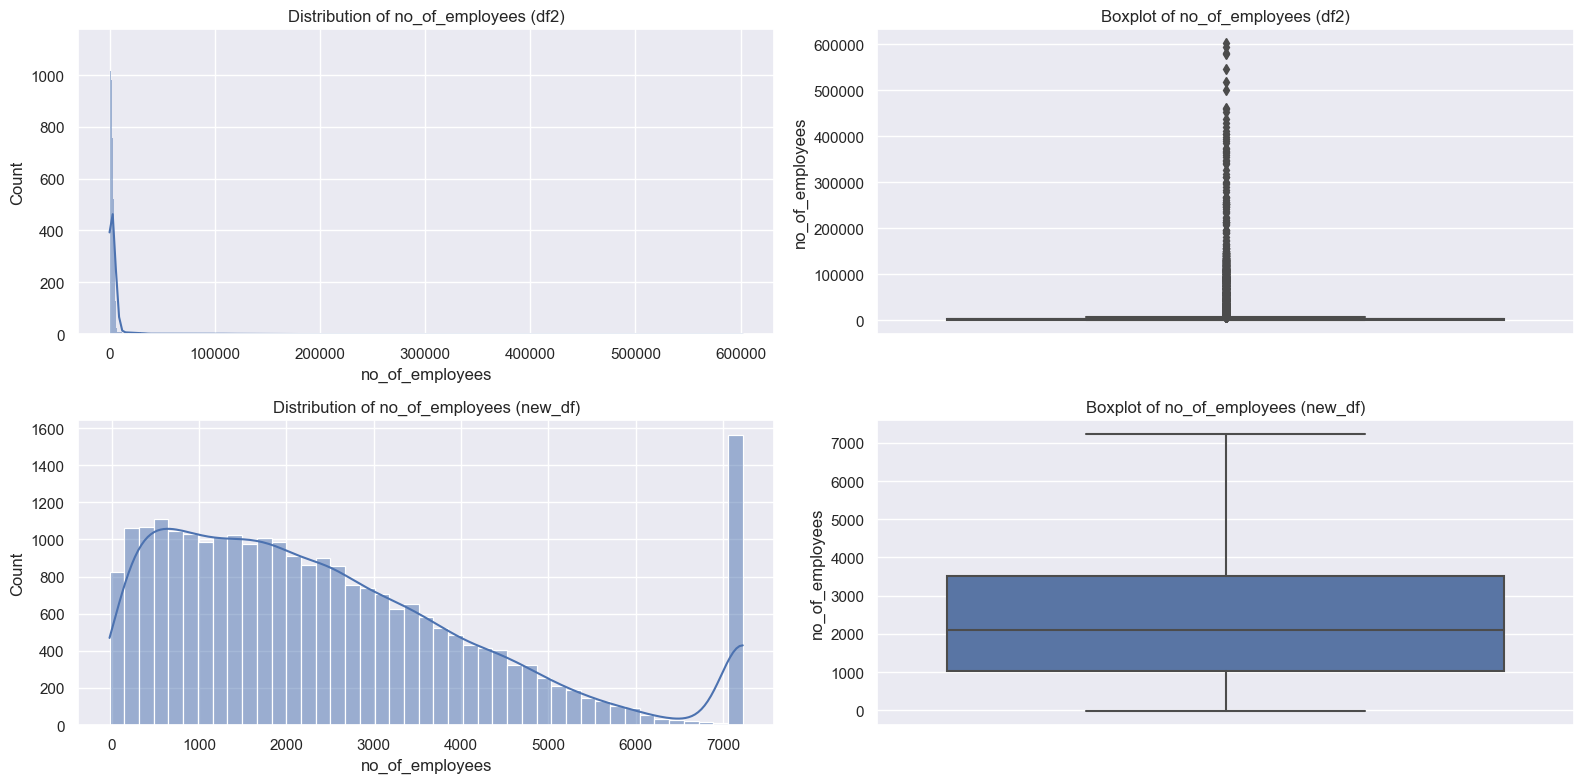

In [1496]:

plt.figure(figsize=(16, 8))

# First dataset - Histogram
plt.subplot(2, 2, 1)
sns.histplot(df2['no_of_employees'], kde=True)
plt.title("Distribution of no_of_employees (df2)")

# First dataset - Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df2['no_of_employees'])
plt.title("Boxplot of no_of_employees (df2)")

# Second dataset - Histogram
plt.subplot(2, 2, 3)
sns.histplot(df3['no_of_employees'], kde=True)
plt.title("Distribution of no_of_employees (new_df)")

# Second dataset - Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(y=df3['no_of_employees'])
plt.title("Boxplot of no_of_employees (new_df)")

plt.tight_layout()
plt.show()


In [1497]:
new_df_cap = df3.copy()

new_df_cap['prevailing_wage'] = np.where(
    new_df_cap['prevailing_wage'] > upper_limit_prevailing_wage,
    upper_limit_prevailing_wage,
    np.where(
        new_df_cap['prevailing_wage'] < lower_limit_prevailing_wage,
        lower_limit_prevailing_wage,
        new_df_cap['prevailing_wage']
    )
)

In [1498]:
df2.shape

(25480, 10)

In [1499]:
new_df_cap.shape

(25480, 10)

In [1500]:
new_df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   no_of_employees        25480 non-null  float64
 4   yr_of_estab            25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.9+ MB


In [1501]:
new_df_cap.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,7227.0,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,2412.0,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,7227.0,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,98.0,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,1082.0,2005,South,149907.3900,Year,Y,Certified


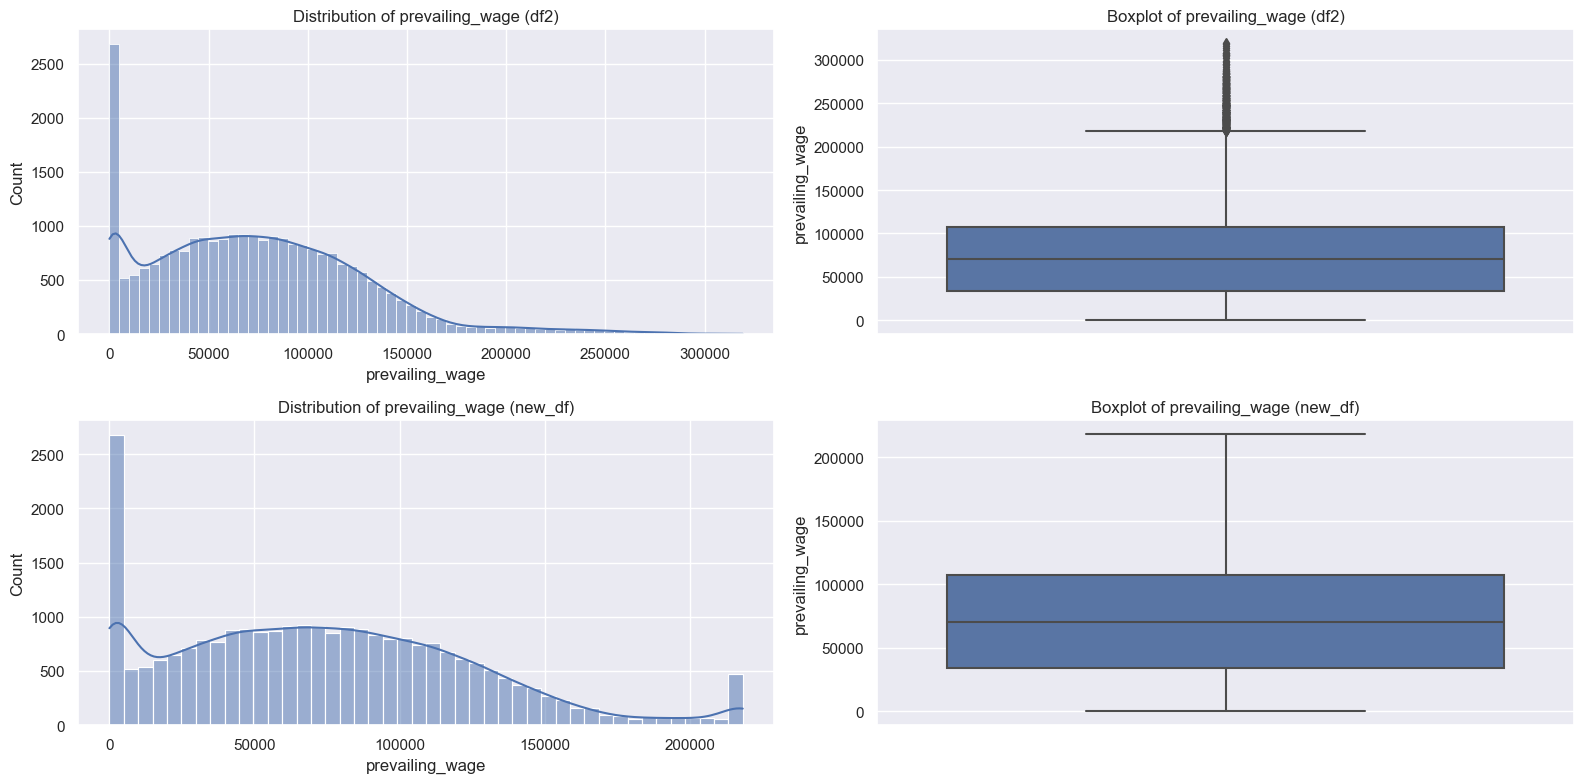

In [1502]:

plt.figure(figsize=(16, 8))

# First dataset - Histogram
plt.subplot(2, 2, 1)
sns.histplot(df2['prevailing_wage'], kde=True)
plt.title("Distribution of prevailing_wage (df2)")

# First dataset - Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df2['prevailing_wage'])
plt.title("Boxplot of prevailing_wage (df2)")

# Second dataset - Histogram
plt.subplot(2, 2, 3)
sns.histplot(new_df_cap['prevailing_wage'], kde=True)
plt.title("Distribution of prevailing_wage (new_df)")

# Second dataset - Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(y=new_df_cap['prevailing_wage'])
plt.title("Boxplot of prevailing_wage (new_df)")

plt.tight_layout()
plt.show()


## Model buildeing 


In [1503]:
new_df_cap.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,7227.0,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,2412.0,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,7227.0,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,98.0,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,1082.0,2005,South,149907.3900,Year,Y,Certified


In [1504]:
## handling categorical values
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder

In [1505]:
lb= LabelEncoder()

In [1506]:
OHN=OneHotEncoder(drop='first',sparse=False)

In [1507]:
encoded_cols = OHN.fit_transform(new_df_cap[['continent','education_of_employee','region_of_employment','unit_of_wage']])
encoded_df = pd.DataFrame(encoded_cols, columns=OHN.get_feature_names_out())

# Drop original categorical columns and merge new encoded columns
new_df_cap = new_df_cap.drop(columns=['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage'])
new_df_cap = pd.concat([new_df_cap, encoded_df], axis=1)

In [1508]:
new_df_cap.head()

,has_job_experience,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,...,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,N,7227.0,2007,592.2029,Y,Denied,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Y,2412.0,2002,83425.6500,Y,Certified,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,N,7227.0,2008,122996.8600,Y,Denied,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,N,98.0,1897,83434.0300,Y,Denied,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Y,1082.0,2005,149907.3900,Y,Certified,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [1509]:
new_df_cap['has_job_experience']=lb.fit_transform(new_df_cap['has_job_experience'])
new_df_cap['full_time_position']=lb.fit_transform(new_df_cap['full_time_position'])
new_df_cap['case_status']=lb.fit_transform(new_df_cap['case_status'])

In [1510]:
# new_df_cap.drop(columns='yr_of_estab',inplace=True)

In [1511]:
new_df_cap.head()

,has_job_experience,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,...,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,7227.0,2007,592.2029,1,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2412.0,2002,83425.6500,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,7227.0,2008,122996.8600,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,98.0,1897,83434.0300,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,1082.0,2005,149907.3900,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [1512]:
x=new_df_cap.drop(columns=['case_status'])
y=new_df_cap['case_status']

In [1513]:
## handling Imblaced data
from imblearn.over_sampling import SMOTE

oversample=SMOTE()
x,y = oversample.fit_resample(x,y)

In [1514]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
# # ru=RandomUnderSampler()
# ro=RandomOverSampler()

In [1515]:
# # ru.fit(x,y)
# ro.fit(x,y)

In [1516]:
# # ru_x,ru_y=ru.fit_resample(x,y)
# ro_x,ro_y=ro.fit_resample(x,y)

In [1517]:
# # ru_y.value_counts()
# ro_y.value_counts()

In [1518]:
from sklearn.model_selection import  train_test_split


In [1519]:
x_train,x_test,y_train,y_test=train_test_split(ro_x,ro_y,test_size=0.2,random_state=42)

In [1520]:
from sklearn.preprocessing import StandardScaler

In [1521]:
std=StandardScaler()

In [1522]:
# transform train and test sets
X_train_scaled= std.fit_transform(x_train)
X_test_scaled= std.fit_transform(x_test)

In [1523]:
x_train

,has_job_experience,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
11567,1,2048.0,1993,55348.25,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
14261,1,79.0,1998,4409.09,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10509,0,943.0,2000,107445.51,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
14065,1,2196.0,2001,8600.94,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2604,1,2300.0,2006,94386.89,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,1,7227.0,2007,71565.18,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6265,1,1212.0,2000,11468.31,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11284,1,7227.0,1998,108447.77,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0,2922.0,2001,96192.58,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [1524]:
X_train_scaled

array([[ 0.91264353, -0.22643907,  0.32679685, ..., -0.05726616,
        -0.10783878,  0.36738659],
       [ 0.91264353, -1.28252281,  0.44495824, ..., -0.05726616,
        -0.10783878,  0.36738659],
       [-1.09571806, -0.81911176,  0.49222279, ..., -0.05726616,
        -0.10783878,  0.36738659],
       ...,
       [ 0.91264353,  2.55134546,  0.44495824, ..., -0.05726616,
        -0.10783878,  0.36738659],
       [-1.09571806,  0.24233554,  0.51585506, ..., -0.05726616,
        -0.10783878,  0.36738659],
       [ 0.91264353,  1.97637249,  0.75217783, ..., -0.05726616,
        -0.10783878,  0.36738659]])

In [1525]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)

In [1526]:
X_train_scaled

,has_job_experience,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.912644,-0.226439,0.326797,-0.333291,0.344193,0.703545,-0.393826,-0.390648,-0.09046,-0.194348,-0.281714,-0.451877,1.379859,-0.435274,-0.635278,-0.608359,1.654862,-0.057266,-0.107839,0.367387
1,0.912644,-1.282523,0.444958,-1.319904,0.344193,0.703545,-0.393826,-0.390648,-0.09046,-0.194348,-0.281714,-0.451877,1.379859,-0.435274,1.574115,-0.608359,-0.604280,-0.057266,-0.107839,0.367387
2,-1.095718,-0.819112,0.492223,0.675752,0.344193,0.703545,-0.393826,-0.390648,-0.09046,-0.194348,-0.281714,-0.451877,-0.724712,-0.435274,-0.635278,-0.608359,1.654862,-0.057266,-0.107839,0.367387
3,0.912644,-0.147058,0.515855,-1.238714,0.344193,0.703545,-0.393826,-0.390648,-0.09046,-0.194348,-0.281714,-0.451877,-0.724712,-0.435274,-0.635278,-0.608359,1.654862,-0.057266,-0.107839,0.367387
4,0.912644,-0.091278,0.634016,0.422826,0.344193,0.703545,-0.393826,-0.390648,-0.09046,-0.194348,-0.281714,-0.451877,-0.724712,-0.435274,-0.635278,-0.608359,1.654862,-0.057266,-0.107839,0.367387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27223,0.912644,2.551345,0.657649,-0.019195,0.344193,-1.421372,2.539190,-0.390648,-0.09046,-0.194348,-0.281714,-0.451877,-0.724712,-0.435274,1.574115,-0.608359,-0.604280,-0.057266,-0.107839,0.367387
27224,0.912644,-0.674832,0.492223,-1.183178,0.344193,0.703545,-0.393826,-0.390648,-0.09046,-0.194348,-0.281714,-0.451877,1.379859,-0.435274,-0.635278,1.643767,-0.604280,-0.057266,-0.107839,0.367387
27225,0.912644,2.551345,0.444958,0.695164,0.344193,0.703545,-0.393826,-0.390648,-0.09046,-0.194348,-0.281714,2.212993,-0.724712,-0.435274,-0.635278,1.643767,-0.604280,-0.057266,-0.107839,0.367387
27226,-1.095718,0.242336,0.515855,0.457800,0.344193,-1.421372,2.539190,-0.390648,-0.09046,-0.194348,-0.281714,-0.451877,1.379859,-0.435274,-0.635278,-0.608359,1.654862,-0.057266,-0.107839,0.367387


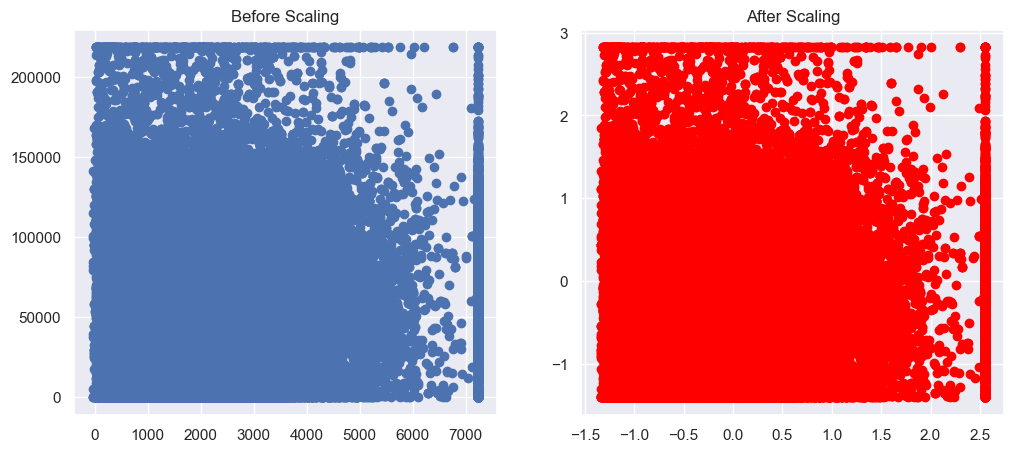

In [1527]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['no_of_employees'], x_train['prevailing_wage'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['no_of_employees'], X_train_scaled['prevailing_wage'],color='red')
ax2.set_title("After Scaling")
plt.show()


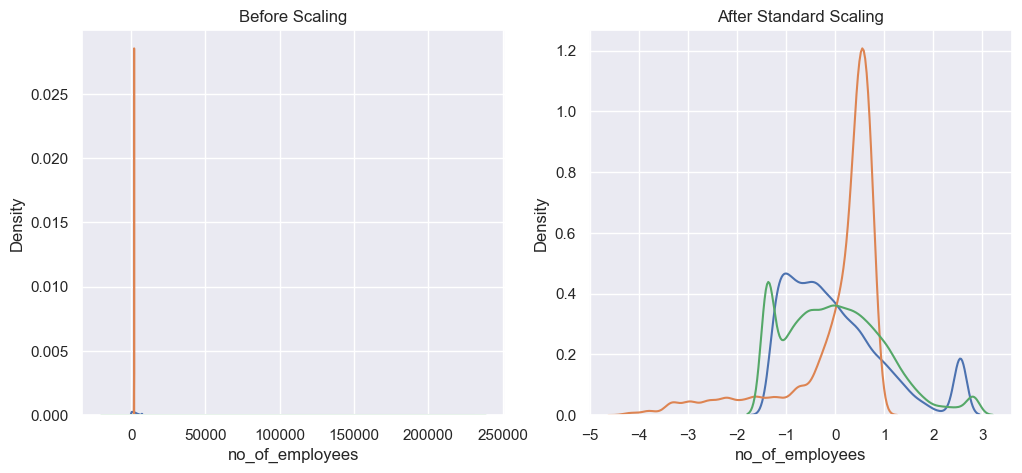

In [1528]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))  # Fix ncols

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['no_of_employees'], ax=ax1)
sns.kdeplot(x_train['yr_of_estab'], ax=ax1)
sns.kdeplot(x_train['prevailing_wage'], ax=ax1)

# After Scaling (Fix column names)
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['no_of_employees'], ax=ax2)  # Match original columns
sns.kdeplot(X_train_scaled['yr_of_estab'], ax=ax2)  # Fix typo
sns.kdeplot(X_train_scaled['prevailing_wage'], ax=ax2)

plt.show()


In [1529]:
import numpy as np

X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
print(pd.DataFrame(X_train_scaled).isnull().sum().sum())  # Should be 0
print(pd.DataFrame(X_test_scaled).isnull().sum().sum())

0
0


In [1530]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [1531]:
lr =LogisticRegression(solver='liblinear',random_state=123)
lr.fit(X_train_scaled,y_train)


LogisticRegression(random_state=123, solver='liblinear')

In [1532]:
y_pred_lr=lr.predict(X_test_scaled)

In [1533]:
lr.score(X_test_scaled,y_test)

0.6952115158636898

In [1534]:
svm =SVC()
svm.fit(X_train_scaled,y_train)


SVC()

In [1535]:
y_pred_svm=svm.predict(X_test_scaled)

In [1536]:
svm.score(X_test_scaled,y_test)

0.7113689776733255

In [1537]:
Rf =RandomForestClassifier(n_estimators=100,random_state=42)
Rf.fit(X_train_scaled,y_train)
y_pred_Rf=Rf.predict(X_test_scaled)
Rf.score(X_test_scaled,y_test)

0.8188895417156287

In [1538]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [1539]:
confusion_matrix(y_test,y_pred_lr)

array([[2383, 1038],
       [1037, 2350]], dtype=int64)

In [1540]:
confusion_matrix(y_test,y_pred_svm)

array([[2527,  894],
       [1071, 2316]], dtype=int64)

In [1541]:
confusion_matrix(y_test,y_pred_Rf)

array([[2649,  772],
       [ 461, 2926]], dtype=int64)

In [1542]:
# print(cross_val_score(SVC(),X_train_scaled,y_train))
# print(cross_val_score(LogisticRegression(),X_train_scaled,y_train))
# print(cross_val_score(RandomForestClassifier(),X_train_scaled,y_train))

In [1543]:
# sns.heatmap(cf,annot=True)

In [1544]:
# disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=y_test)
# disp.plot(cmap=plt.cf.Blues)
# pli.show()

In [1545]:
# categorical_cols = df3.select_dtypes(include=['object']).columns

In [1546]:
# encoder={}

# #apply lable encoder and store the encoders
# for col in categorial_fearues:
#     ohe=OneHotEncoder()
#     df[col]=ohe.fit_transform(df[col])
#     encoder[col]=ohe

# #save the encoder to pickle file 
# with open("encoder.pkl","wb") as f:
#     pickle.dump(encoder,f)   

In [1547]:
# # save the trained model as a pickle file
# model_data = {"model": Rf, "features_names": x.columns.tolist()}


# with open("visa_prediction_model.pkl", "wb") as f:
#   pickle.dump(model_data, f)

In [1548]:
# # load teh saved model and the feature names

# with open("visa_prediction_model.pkl", "rb") as f:
#   model_data = pickle.load(f)

# loaded_model = model_data["model"]
# feature_names = model_data["features_names"]

In [1549]:
# print(loaded_model)

In [1550]:
# print(feature_names)

In [1551]:
# input_data = {
#     "continent": "Asia",
#     "education_of_employee": "Master's",
#     "has_job_experience": "Y",
#     "no_of_employees": 2412,
#     "yr_of_estab": 2002,
#     "region_of_employment": "Northeast",
#     "prevailing_wage": 83425.65,
#     "unit_of_wage": "Year",
#     "full_time_position": "Y"
# }


# input_data_df = pd.DataFrame([input_data])

# with open("encoder.pkl", "rb") as f:
#   encoder = pickle.load(f)


# # encode categorical featires using teh saved encoders
# for column, enc in encoder.items():
#     if column in input_data_df.columns:
#         unseen_labels = set(input_data_df[column]) - set(enc.classes_)
#         if unseen_labels:
#             print(f"Warning: New categories {unseen_labels} found in column {column}. Assigning 'Unknown' category.")
#             enc.classes_ = np.append(enc.classes_, list(unseen_labels))  # Add new labels
#         input_data_df[column] = enc.transform(input_data_df[column])


# # make a prediction
# prediction = loaded_model.predict(input_data_df)
# pred_prob = loaded_model.predict_proba(input_data_df)

# print(prediction)

# # results
# print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
# print(f"Prediciton Probability: {pred_prob}")